In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
url='https://raw.githubusercontent.com/pran9803/TrafficPredictor/main/traffic.csv?token=GHSAT0AAAAAACMO2V45LHARPFO3UBS2S55GZRAEAGQ'
data = pd.read_csv(url)
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [6]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
# Extract and assign components of the datetime to new columns
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['DayOfMonth'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['Second'] = data['DateTime'].dt.second
data['WeekDay'] = data['DateTime'].dt.weekday + 1 # Monday is assigned 1, Tue 2 and so on..

data.head()

,DateTime,Junction,Vehicles,ID,Year,Month,DayOfMonth,Hour,Minute,Second,WeekDay
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,0,0,7
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,0,0,7
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,0,0,7
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,0,0,7
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,0,0,7


In [7]:
# Drop ID because it is just for identification purpose and not of use in prediction
# Drop Datetime as we split Date, day, hr, second into different columns
# Drop Minute,Second as it is always 0 because the data is collected at every hour
data = data.drop(['ID', 'DateTime', 'Minute', 'Second'], axis=1)


# Display the first few rows of the dataframe to verify the changes
data.head()

,Junction,Vehicles,Year,Month,DayOfMonth,Hour,WeekDay
0,1,15,2015,11,1,0,7
1,1,13,2015,11,1,1,7
2,1,10,2015,11,1,2,7
3,1,7,2015,11,1,3,7
4,1,9,2015,11,1,4,7


In [8]:
#checking for missing values
print(data.isna().sum()/data.shape[0]*100)

Junction      0.0
Vehicles      0.0
Year          0.0
Month         0.0
DayOfMonth    0.0
Hour          0.0
WeekDay       0.0
dtype: float64


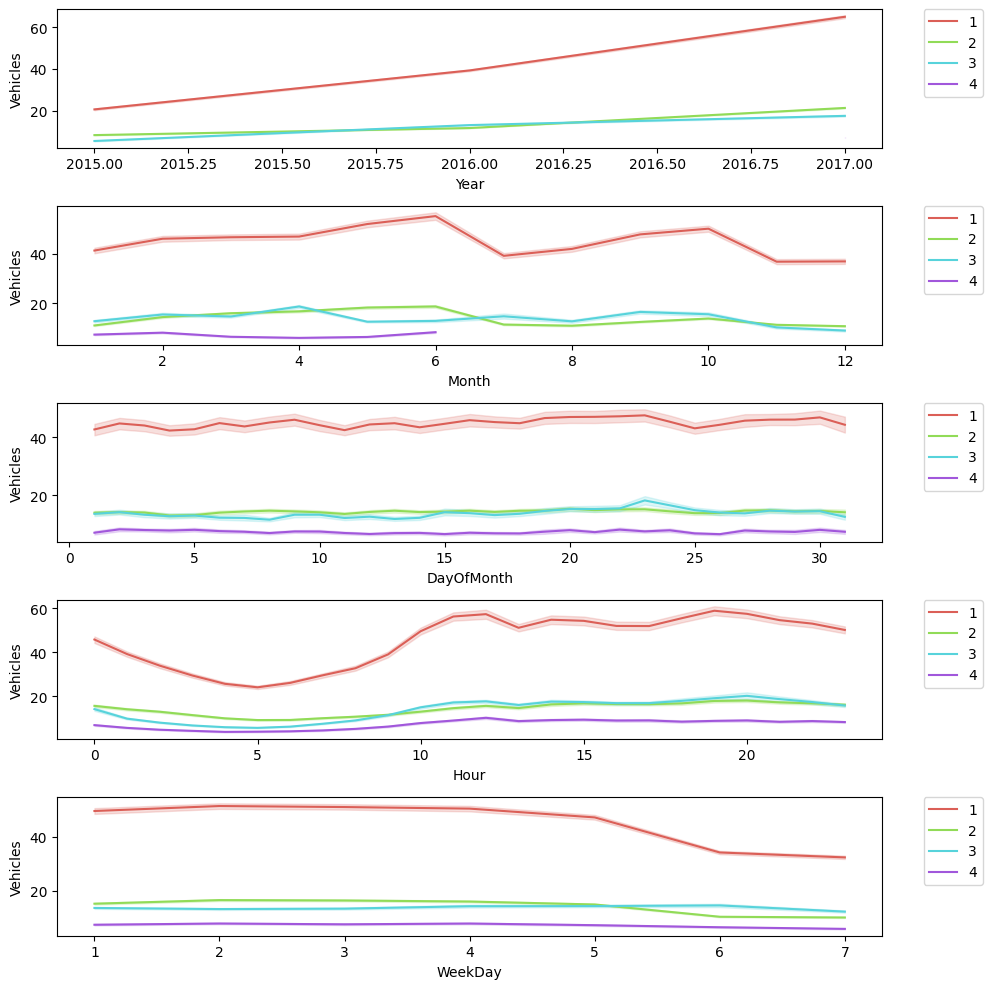

In [9]:
new_features = ["Year", "Month", "DayOfMonth", "Hour", "WeekDay"]
colors = sns.color_palette("hls", n_colors=len(data["Junction"].unique()))

fig, axes = plt.subplots(len(new_features), 1, figsize=(10, len(new_features) * 2))

for i, feature in enumerate(new_features):
    ax = sns.lineplot(x=data[feature], y="Vehicles", data=data, hue="Junction", palette=colors, ax=axes[i])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Date')

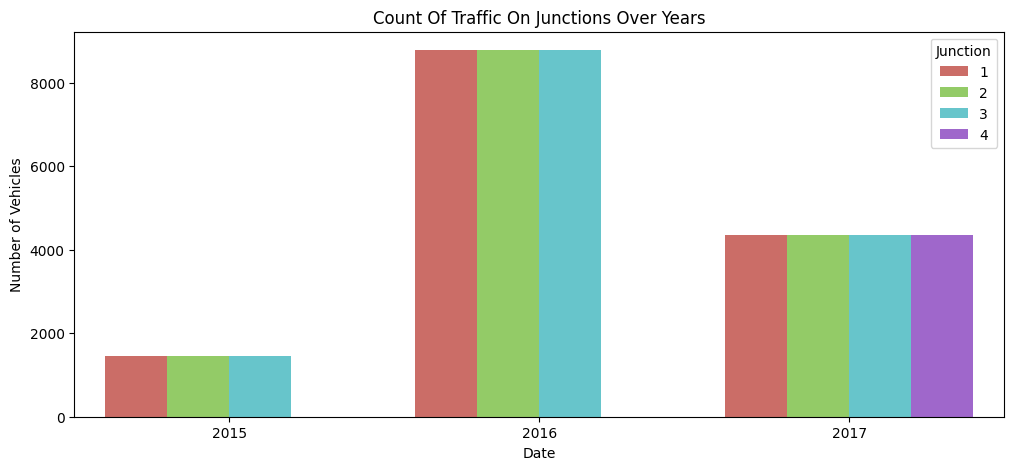

In [10]:
plt.figure(figsize=(12,5))
count = sns.countplot(data=data, x =data["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

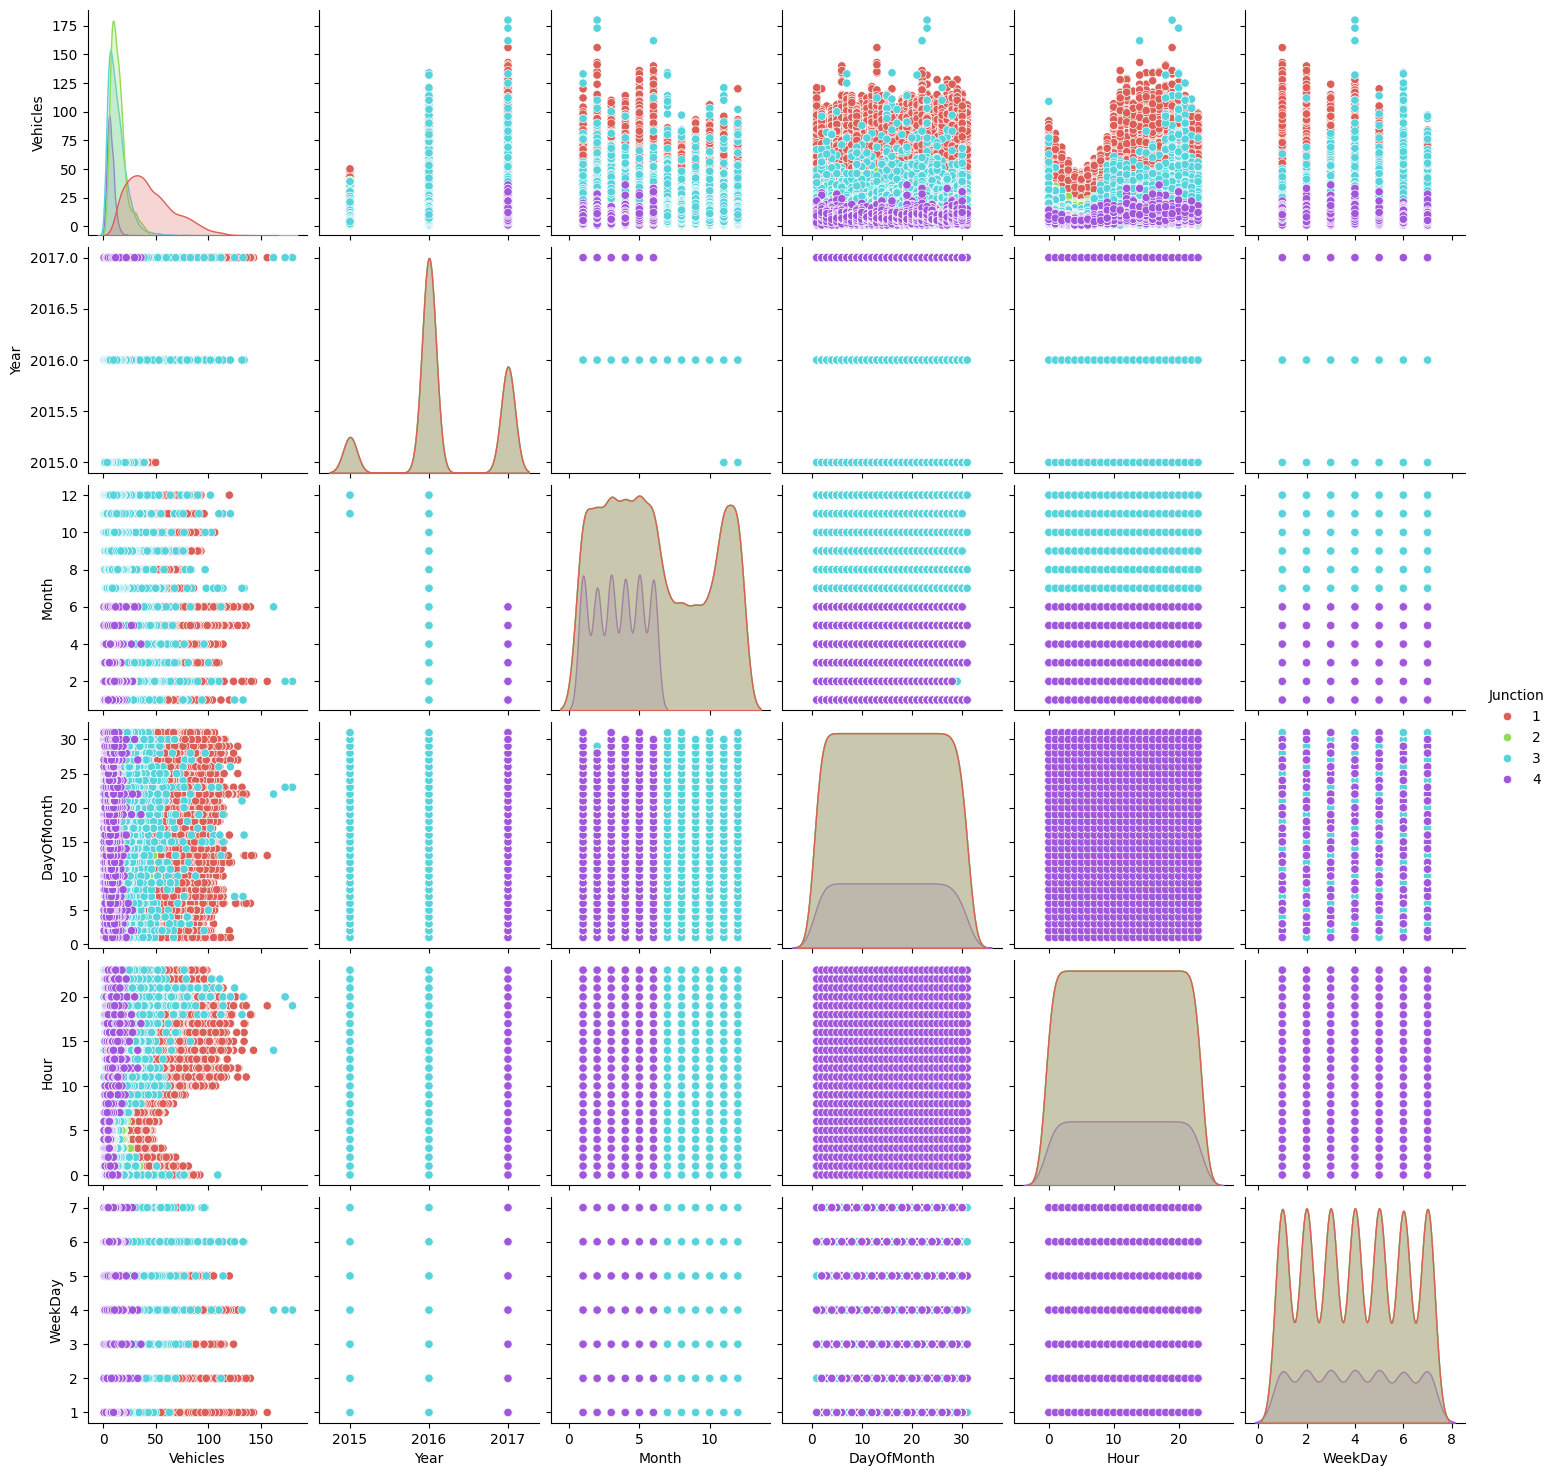

In [11]:
sns.pairplot(data=data, hue= "Junction",palette=colors)